Data citation:
Cheng, Jun. "brain tumor dataset." Figshare. Dataset posted on 02/04/2017. https://figshare.com/articles/dataset/brain_tumor_dataset/1512427

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

-----
This data was used in the following paper:

1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).

2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on github 
https://github.com/chengjun583/brainTumorRetrieval

-----
Jun Cheng
School of Biomedical Engineering
Southern Medical University, Guangzhou, China
Email: chengjun583@qq.com



In [1]:
# pip install opencv-python

**Importing necessary libraries**

In [2]:
import os
folder = 'C:/Users/vinhm/Springboard/Capstones/Capstone 2 Brain Tumor Classification/Data/'
os.chdir(folder + 'brainTumorDataPublic_1-3064')

import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import pandas as pd
import cv2
import scipy
from scipy import io
from itertools import chain
from sklearn.model_selection import train_test_split
from PIL import Image

Obtaining files from directory location

In [3]:
files = pd.DataFrame(glob('*'))
files = files.values.tolist()
files = list(chain(*files))
files = files[0:100] 

Number of files:

In [4]:
print(len(files))

100


Convert filename to include leading '0'

In [5]:
# for file in files[0:10]:
#     filestr = ''.join([str(item) for item in file])
#     filename = os.path.splitext(filestr)[0]
#     filenum = filename.replace('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/brainTumorDataPublic_1-3064\\', '')
#     newnum = filenum.zfill(4)
#     newname = r'C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/brainTumorDataPublic_1-3064\\' + newnum + '.mat'
#     os.rename(filestr, newname)
#     print(newname)

Saving .mat file images as .png

In [6]:
# for x in files:
#     f = h5py.File(x, 'r')
#     tumorMask = f['cjdata']['tumorMask']
#     filenum = x.replace('.mat', '')
#     plt.imsave('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images\\' + filenum + '_mask.png', tumorMask)

In [7]:
# for x in files:
#     f = h5py.File(x, 'r')   
#     image = f['cjdata']['image']    
#     filenum = x.replace('.mat', '')
#     plt.imsave('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images\\' + filenum + '_mri.png', image)

In [8]:
f = h5py.File('0001.mat', 'r')
print("Data Keys: ", list(f['cjdata'].keys()))
PID = f['cjdata']['PID']
PID = list(chain(*PID))
PID = ''.join([str(item) for item in PID])
print(PID)
PID = "Patient ID: " + PID
print(PID)
label = list(f['cjdata']['label'][0])
print(label)
for i in range(0, len(label)):
        label[i] = int(label[i])
label = ''.join([str(item) for item in label])
if label == 1:
    label = "Meningioma"
elif label == 2:
    label = "Glioma"
else:
    label = "Pituitary Tumor"
print(label)
image = f['cjdata']['image']
tumorMask = f['cjdata']['tumorMask']

Data Keys:  ['PID', 'image', 'label', 'tumorBorder', 'tumorMask']
494848515448
Patient ID: 494848515448
[1.0]
Pituitary Tumor


 File Name:   0001.mat


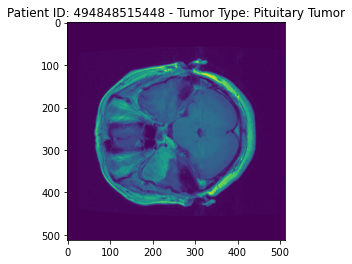

In [9]:
print('\033[1m', "File Name: ", '\033[0m', '0001.mat')
plt.imshow(image)
plt.title(PID + " - Tumor Type: " + label)
cmap = plt.cm.jet


 File Name:   0001.mat


Text(0.5, 1.0, 'Patient ID: 494848515448Pituitary Tumor')

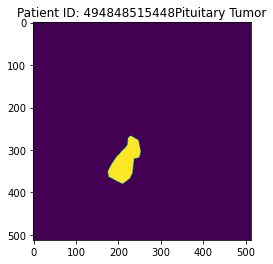

In [10]:
print('\033[1m', "File Name: ", '\033[0m', '0001.mat')
plt.imshow(tumorMask)
plt.title(PID + " - Tumor Type: " + label)
plt.title(PID + label)


 File Name:   0001.mat


Text(0.5, 1.0, 'Patient ID: 494848515448Pituitary Tumor')

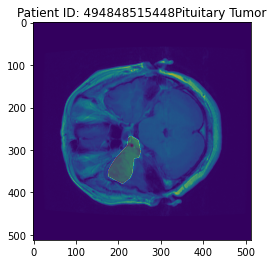

In [11]:
print('\033[1m', "File Name: ", '\033[0m', '0001.mat')
plt.imshow(image)
plt.imshow(tumorMask, cmap='jet', alpha=0.25)
plt.title(PID + " - Tumor Type: " + label)
plt.title(PID + label)

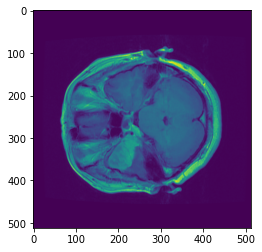

In [12]:
img1 = mpimg.imread(folder + "images/0001_mri.png")
plt.imshow(img1)

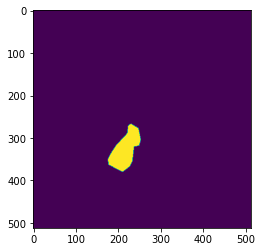

In [13]:
img2 = mpimg.imread(folder + "images/0001_mask.png")
plt.imshow(img2)

Analyze the pixel values of the mask image.

In [14]:
cv2.imread(folder + "images/0001_mask.png").max()

255

In [15]:
cv2.imread(folder + "images/0001_mask.png").min()

0

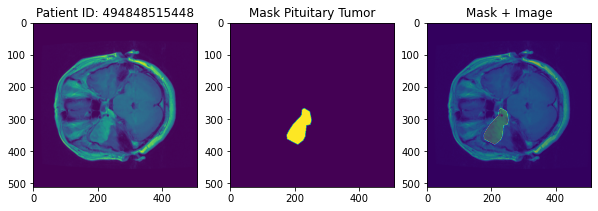

In [16]:
fig = plt.figure(figsize=(10, 7))

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)

plt.imshow(img1)
plt.axis('on')
plt.title(PID)

fig.add_subplot(rows, columns, 2)

plt.imshow(img2)
plt.axis('on')
plt.title("Mask " + label)

fig.add_subplot(rows, columns, 3)

plt.imshow(image)
plt.imshow(tumorMask, cmap='jet', alpha=0.25)
plt.axis('on')
plt.title("Mask + Image")
f.close()

Combining elements of data and plotting image provided. A mask for tumor location was applied to each file. 

 File Location:   0001.mat


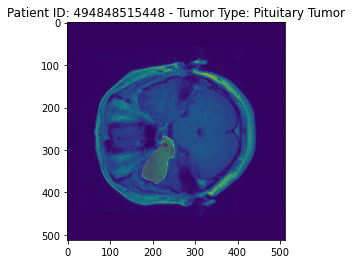

 File Location:   0002.mat


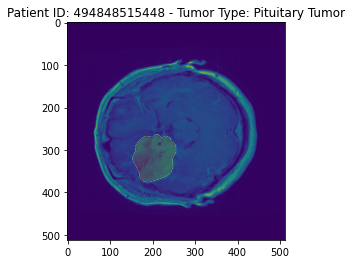

 File Location:   0003.mat


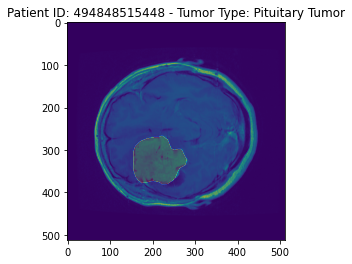

 File Location:   0004.mat


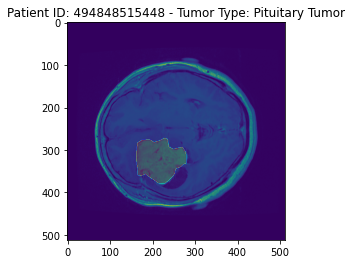

 File Location:   0005.mat


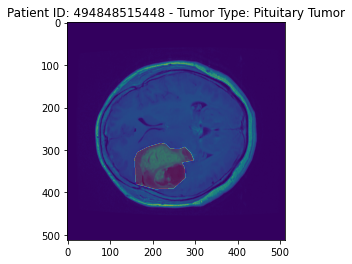

 File Location:   0006.mat


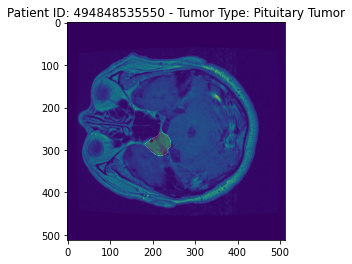

 File Location:   0007.mat


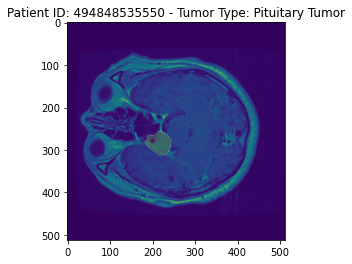

 File Location:   0008.mat


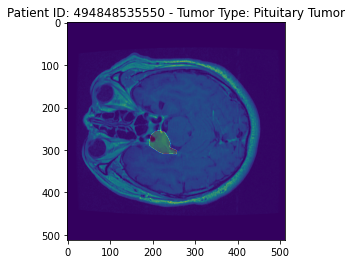

 File Location:   0009.mat


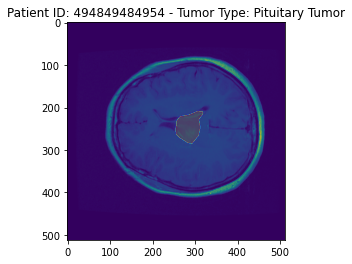

 File Location:   0010.mat


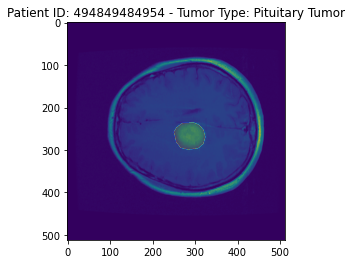

In [17]:
#IDEA: change background color of mask to gray
#      overlay mask on mri
#IDEA: change image source from .mat files to .png files 

P_ID = []
tumlab = []
image_path = []
mask_path = []

for x in files[0:10]: #remove '[0:10]' for all data
    f = h5py.File(x, 'r')
    PID = f['cjdata']['PID']
    PID = list(chain(*PID))
    PID = ''.join([str(item) for item in PID])
    PatID = "Patient ID: " + PID
    print('\033[1m', "File Location: ", '\033[0m', x)
    
    label = list(f['cjdata']['label'])
    for i in range(0, len(label)):
        label[i] = int(label[i])
    label = ''.join([str(item) for item in label])
    
    image = f['cjdata']['image']
    imgplot = plt.imshow(image)
    
    tumorMask = f['cjdata']['tumorMask']
    maskplot = plt.imshow(tumorMask, cmap='jet', alpha=0.25)
    if label == 1:
        label = "Meningioma"
    elif label == 2:
        label = "Glioma"
    else:
        label = "Pituitary Tumor"
    
    plt.title(PatID + " - Tumor Type: " +label)
    plt.show()
    P_ID.append(PID)
    tumlab.append(label)

In [18]:
df = {}

In [19]:
df = pd.DataFrame(df)
df['Patient ID'] = P_ID
df['Tumor Type'] = tumlab
print(df)

     Patient ID       Tumor Type
0  494848515448  Pituitary Tumor
1  494848515448  Pituitary Tumor
2  494848515448  Pituitary Tumor
3  494848515448  Pituitary Tumor
4  494848515448  Pituitary Tumor
5  494848535550  Pituitary Tumor
6  494848535550  Pituitary Tumor
7  494848535550  Pituitary Tumor
8  494849484954  Pituitary Tumor
9  494849484954  Pituitary Tumor


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient ID  10 non-null     object
 1   Tumor Type  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


convert .mat to .csv

https://www.google.com/search?q=how+to+make+a+.csv+file+of+.mat+files&rlz=1C1FKPE_enUS961US961&oq=how+to+make+a+.csv+file+of+.mat+files&aqs=chrome..69i57j33i160j33i299j33i22i29i30l2.10523j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_OI-EYpDKEKTEqtsPkMCJmAw18

walkthrough

https://www.analyticsvidhya.com/blog/2021/06/brain-tumor-detection-and-localization-using-deep-learning-part-1/

Change Mask to Black and White

In [21]:
# directory = 'C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/'
# filelist = [] 
# for x in os.scandir(directory):
#     if x != None and "_mask.png" in x.path:   
#         filelist.append(x.path)
# # print(filelist)

# for x in filelist:
# #     print(x)
#     originalImage = cv2.imread(x)
#     grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
#     (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
 
#     cv2.imshow('Black white image', blackAndWhiteImage)
#     cv2.imwrite(x, blackAndWhiteImage)

Change MRI to Black and White

In [22]:
# directory = 'C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/New folder'
# filelist = [] 
# for x in os.scandir(directory):
#     if x != None and "_mri.png" in x.path:   
#         filelist.append(x.path)
# # print(filelist)

# for x in filelist:
# #     print(x)
#     originalImage = cv2.imread(x)
#     grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
#     (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
 
#     cv2.imshow('Black white image', blackAndWhiteImage)
#     cv2.imwrite(x, blackAndWhiteImage)

In [23]:
# for x in files:
#     # Open PIL image
#     filenum = x.replace('.mat', '')
#     im = Image.open('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/' + filenum + '_mri.png')

#     # Convert to NumPy array
#     pixels = np.array(im)
# #     print(pixels)
#     # Get logical indices of allpurple pixels
#     idx_purple = (pixels == (68, 1, 84, 255)).all(axis=2)

#     # Generate black image; set alpha channel to 255
#     out = np.zeros(pixels.shape, np.uint8)
#     out[:, :, 3] = 0

#     # Set purple pixels to transparent
#     out[idx_purple] = (255, 255, 255, 0)

#     # Convert back to PIL image
#     im = Image.fromarray(out)
#     im.save('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/New folder/' + filenum + '_mri.png')

In [24]:
# for x in files:
#     filenum = x.replace('.mat', '')
#      rgba_im = PIL.Image.open('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/' + filenum + '_mri.png')
#     im = rgba_im.convert('RGB')
#     # Check it is palettised as expected
#     if im.mode != 'P':
#         sys.exit("ERROR: Was expecting a palettised image")

#     # Get palette and make into Numpy array of 256 entries of 3 RGB colours
#     palette = np.array(im.getpalette(),dtype=np.uint8).reshape((256,3))

#     # Name our colours for readability
#     purple = [68,1,84]
#     white  = [255,255,255]
#     black  = [0,0,0]

#     # Go through palette, setting purple to black
#     palette[np.all(palette==purple, axis=-1)] = black

#     # Go through palette, setting anything not black to white
#     palette[~np.all(palette==white, axis=-1)] = white

#     # Apply our modified palette and save
#     im.putpalette(palette.ravel().tolist())
    
#     im.save('C:/Users/vinhm/Springboard-Capstone/Capstone Two Data Wrangling/Data/images/New folder/' + filenum + '_mri.png', image)